# Project: Investigate TMDb-Movies Between Year 1960 and 2015 Using Descriptive Statisitics

### Introduction
<p style="size:40px";>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.</p>

### Potential Questions
<p>
<ol>
    <li> Which genres are most popular from year to year? </li>
    <li> What kinds of properties are associated with movies that have high revenues?</li>
    <li> What is the relationship between movies rate duration? </li>
    <li> What is the average runtime of most rated movies? </li>
    <li> What is the profit generated by the most rated movie year to year?</li>
    <li> What is the budget of the most rated and least rated movies?</li>
    <li> What is the relation between movies rating and popularity?</li>
    <li> What is the genre of the most rated movies?</li>
</ol>
</p>

###### Upload the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Load the data and view the first 2 observations of the data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# information about the data. The number of observations and features in the data set
# the type of values in each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are total of `10866` observations and `21` festures. It can also be seen that the `release_date` feature is a float type instead of date type 

In [4]:
# descriptive statistics of the numerical features of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check if there is a missing value in the dataset
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#  number of unique values in each feature
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# what type of data is in the first observation
df.iloc[0, :]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                      32.985763
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

### Data Cleaning

In [8]:
# removing some of the features that are unimportant
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'cast', 'release_date',
        'director'], 
        axis=1, inplace=True)

In [9]:
# track the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [47]:
# check duplicate observation in data and if any, frop 1
sum(df.duplicated())

1

In [52]:
# thre is just one duplicate in the data set which has to be droped
df.drop_duplicates(inplace=True)

In [53]:
# verify the drop of a duplicated observation
sum(df.duplicated())

0

There is no more duplicate in the dataset

In [10]:
# Remove the observations with missing values in genres feature
df.dropna(axis=0, inplace=True)

It should be noted that some of these features are not needed for my analysis here. That was the reason why i drop some of those features.

In [11]:
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [12]:
# create a profit feature from budget and revenue feature
# create a profit feature
df['profit'] = df['revenue'] - df['budget']

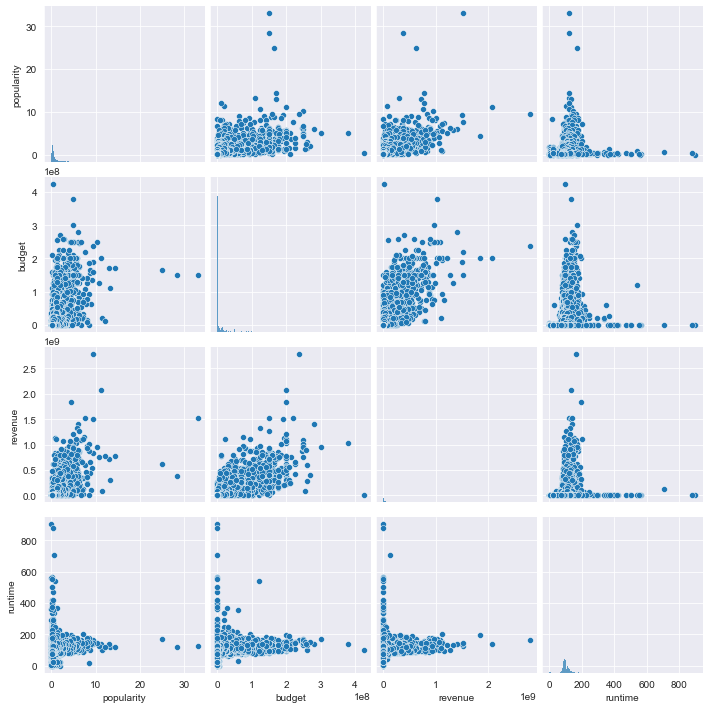

In [13]:
# visualize the relationship between the first 5 numerical features
sns.pairplot(df[df.columns[:5]])

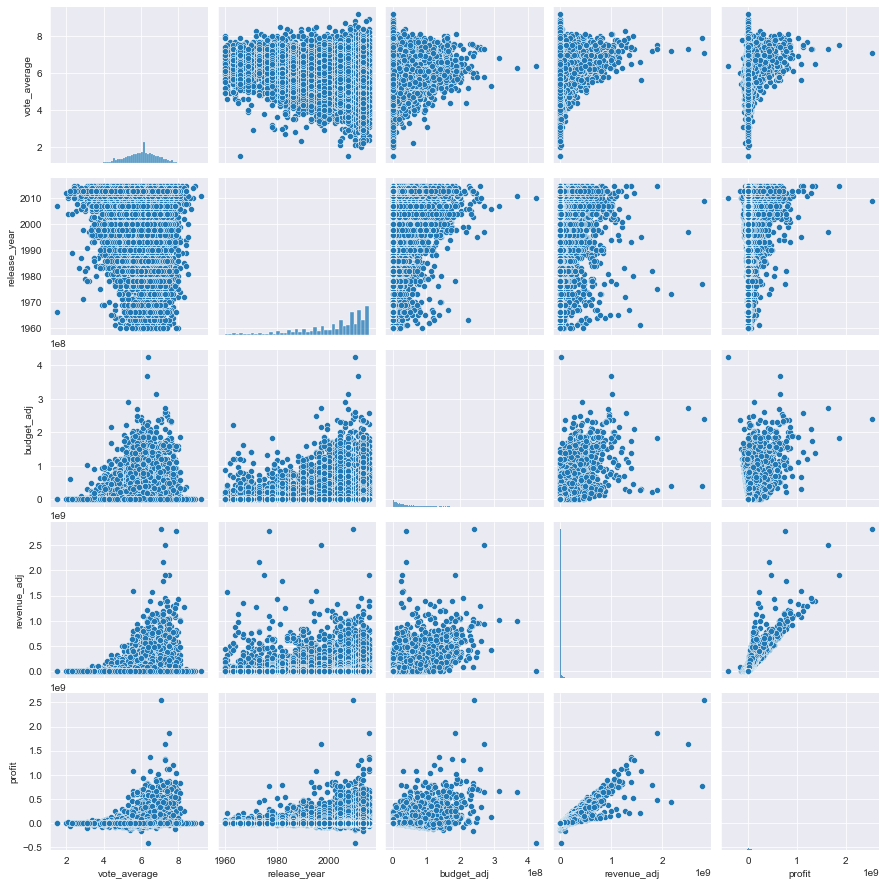

In [14]:
# visualize the relationship between the last 5 numerical features
sns.pairplot(df[df.columns[-5:]])

**Helper Function for Visualization**

In [15]:
# bar plot function
def histplot1D(x, title, xlabel, ylabel):
    x.hist()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [16]:
# bar plot function
def barplot2D(x, y, title, xlabel, ylabel):
    sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

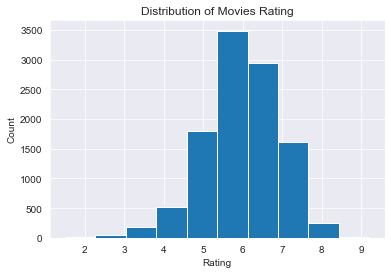

In [17]:
# visualise the distribution of the vote_average feature
histplot1D(df['vote_average'], "Distribution of Movies Rating", "Rating", "Count")

The distribution is skewed to the left.

In [18]:
# pd.plotting.scatter_matrix(df[df.columns[:5]], figsize=(10, 8))

### Exploratory Data Analysis

* **Which genres are most popular from year to year?** 

In [19]:
yearly_most_popular = df.groupby('release_year')[['popularity']].max().reset_index().sort_values(
    by=['release_year', 'popularity'], ascending=False).reset_index(drop=True)

yearly_most_popular.head()

,release_year,popularity
0,2015,32.985763
1,2014,24.949134
2,2013,6.112766
3,2012,7.637767
4,2011,8.411577


In [20]:
for i, year in enumerate(yearly_most_popular['release_year'].unique()):
    yearly_most_popular.loc[i, 'genres'] = df[(df['release_year'] == year) & 
                    (df['popularity'] == yearly_most_popular.loc[i, 'popularity'])]['genres'].values[0]
    yearly_most_popular.loc[i, 'original_title'] = df[(df['release_year'] == year) & 
                    (df['popularity'] == yearly_most_popular.loc[i, 'popularity'])]['original_title'].values[0]

In [21]:
yearly_most_popular5 = yearly_most_popular.loc[:5, :].sort_values('popularity', ascending=False)
yearly_most_popular5

,release_year,popularity,genres,original_title
0,2015,32.985763,Action|Adventure|Science Fiction|Thriller,Jurassic World
1,2014,24.949134,Adventure|Drama|Science Fiction,Interstellar
5,2010,9.363643,Action|Thriller|Science Fiction|Mystery|Adventure,Inception
4,2011,8.411577,Action|Animation|Horror,Underworld: Endless War
3,2012,7.637767,Science Fiction|Action|Adventure,The Avengers
2,2013,6.112766,Animation|Adventure|Family,Frozen


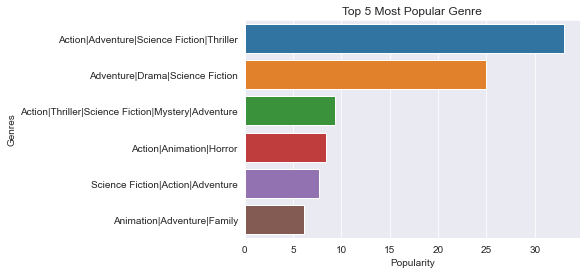

In [22]:
x = yearly_most_popular5['popularity']
y = yearly_most_popular5['genres']
barplot2D(x, y, "Top 5 Most Popular Genre", "Popularity", "Genres")

In 2015, the genre of the most popular movie is: `Action|Adventure|Science Fiction|Thriller`
We can as well check for most awarding genres from `1960-2015`

* **What kinds of properties are associated with movies that have high revenues?**

In [23]:
# movies with revenue that are equal greater than 1 billion
high_rvenue_movies = df[df['revenue'] >= 1000000000].sort_values(by='revenue').reset_index(drop=True)
high_rvenue_movies.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,8.466668,185000000,1001921825,The Dark Knight,152,Drama|Action|Crime|Thriller,8432,8.1,2008,1.873655e+08,1.014733e+09,816921825
1,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,169,Adventure|Fantasy|Action,6417,6.9,2012,2.374361e+08,9.658933e+08,767003568
2,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,Adventure|Action|Fantasy,3180,6.3,2011,3.683713e+08,9.904175e+08,641683000
3,5.572950,200000000,1025467110,Alice in Wonderland,108,Family|Fantasy|Adventure,2853,6.3,2010,2.000000e+08,1.025467e+09,825467110
4,2.711136,200000000,1063171911,Toy Story 3,103,Animation|Family|Comedy,2924,7.5,2010,2.000000e+08,1.063172e+09,863171911


In [24]:
# statistics of movies with revenue greater 1 Billion 
high_rvenue_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,22.00000,2.200000e+01,2.200000e+01,2.200000e+01
mean,7.108372,1.910000e+08,1.333942e+09,140.272727,4779.727273,7.036364,2010.00000,1.891644e+08,1.351031e+09,1.142942e+09
std,6.312792,7.353587e+07,4.282809e+08,28.010511,2257.719080,0.627577,5.45981,7.162627e+07,4.843521e+08,4.276239e+08
min,0.760503,2.200000e+07,1.001922e+09,91.000000,201.000000,5.600000,1995.00000,3.148127e+07,9.658933e+08,6.416830e+08
25%,4.502948,1.587500e+08,1.069505e+09,125.500000,3005.250000,6.575000,2009.25000,1.490037e+08,1.055430e+09,8.637939e+08
50%,5.828121,2.000000e+08,1.140239e+09,139.000000,4479.000000,7.200000,2011.50000,1.894907e+08,1.172701e+09,1.053810e+09
75%,7.579366,2.150000e+08,1.480946e+09,153.500000,6347.000000,7.500000,2013.00000,2.321605e+08,1.390772e+09,1.275373e+09
max,32.985763,3.800000e+08,2.781506e+09,201.000000,8903.000000,8.100000,2015.00000,3.683713e+08,2.827124e+09,2.544506e+09


In [25]:
# the genres of movies with revenues greater than 1Billion
high_rvenue_movies.genres.value_counts()

Adventure|Fantasy|Action                     3
Action|Adventure|Science Fiction             2
Action|Crime|Drama|Thriller                  1
Adventure|Action|Fantasy                     1
Family|Fantasy|Adventure                     1
Animation|Family|Comedy                      1
Drama|Action|Crime|Thriller                  1
Adventure|Family|Fantasy                     1
Action|Adventure|Science Fiction|Thriller    1
Science Fiction|Action|Adventure             1
Action|Adventure|Science Fiction|Fantasy     1
Drama|Romance|Thriller                       1
Action|Crime|Thriller                        1
Action|Adventure|Fantasy|Science Fiction     1
Action|Science Fiction|Adventure             1
Family|Animation|Adventure|Comedy            1
Animation|Adventure|Family                   1
Crime|Drama|Mystery|Thriller|Action          1
Action|Adventure|Thriller                    1
Name: genres, dtype: int64

In [26]:
print(high_rvenue_movies.budget.min())
print(high_rvenue_movies.budget.max())

22000000
380000000


Movies that have the highest revenue are mpstly of the genres `Adventure|Fantasy|Action`, with rating of `5` and `8.1`, average runtime of `140` minutes and budget between `22000000` and `380000000`

* **What is the average runtime of the most rated movies?**

In [27]:
rate_runtime = df.groupby('vote_average')[['runtime']].mean().sort_values('vote_average', ascending=False).reset_index()
rate_runtime.head()

,vote_average,runtime
0,9.2,900.0
1,8.9,88.0
2,8.8,60.5
3,8.7,145.0
4,8.6,163.0


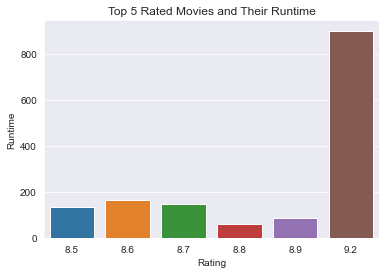

In [28]:
x = rate_runtime['vote_average'].loc[:5]
y = rate_runtime['runtime'].loc[:5]
barplot2D(x, y, "Top 5 Rated Movies and Their Runtime", 'Rating', 'Runtime')

Movies with higher ratings between `8.5` and `9.2` have a runtime of `900` minutes

In [29]:
rate_runtime.tail()

,vote_average,runtime
67,2.3,92.500000
68,2.2,87.333333
69,2.1,90.000000
70,2.0,75.000000
71,1.5,80.000000


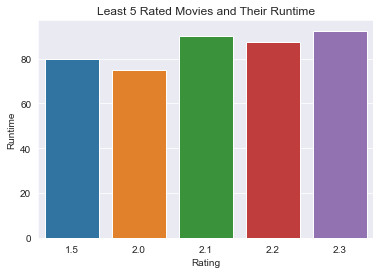

In [30]:
x = rate_runtime['vote_average'].tail()
y = rate_runtime['runtime'].tail()
barplot2D(x, y, "Least 5 Rated Movies and Their Runtime", "Rating", 'Runtime')

Movies with smaller ratings between `105` and `2.3` have a maximum duration of `92.5` minutes.

The most ratd movie seems to having missing values in some important features

In [31]:
# movie with the highest rating
df[df['vote_average'] == 9.2]

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
3894,0.006925,0,0,The Story of Film: An Odyssey,900,Documentary,14,9.2,2011,0.0,0.0,0


* **What genre of movie has the highest average runtime?**

In [32]:
gen_runt = df.groupby('genres')[['runtime']].mean().sort_values('runtime', ascending=False).reset_index()
gen_runt.head()

,genres,runtime
0,War|Drama|Action|Adventure|History,540.0
1,Adventure|Comedy|Family|Fantasy|Mystery,417.0
2,Adventure|Drama|Fantasy|Horror,366.0
3,Drama|History|Western,343.0
4,Crime|Drama|Thriller|History,338.0


In [33]:
gen_runt['prop_runtime'] = (gen_runt['runtime'] / sum(gen_runt['runtime']))*100
gen_runt.head()

,genres,runtime,prop_runtime
0,War|Drama|Action|Adventure|History,540.0,0.256846
1,Adventure|Comedy|Family|Fantasy|Mystery,417.0,0.198342
2,Adventure|Drama|Fantasy|Horror,366.0,0.174084
3,Drama|History|Western,343.0,0.163145
4,Crime|Drama|Thriller|History,338.0,0.160766


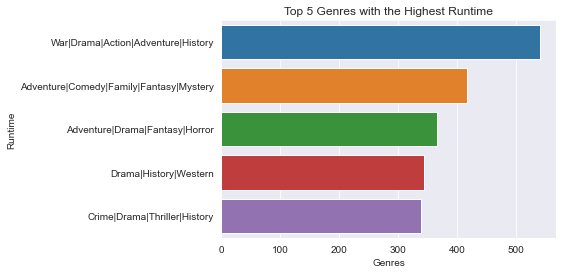

In [34]:
x = gen_runt['runtime'].head()
y = gen_runt['genres'].head()
barplot2D(x, y, "Top 5 Genres with the Highest Runtime", "Genres", 'Runtime')

Most adventure movies last for more than 200 minutes

* **What is the profit generated by the most rated movie year to year?**

In [35]:
most_profited5 = df[['original_title', 'genres', 'runtime', 'popularity', 'vote_average', 'profit']].sort_values(
    by="profit", ascending=False).reset_index(drop=True)

In [36]:
most_profited5.head()

,original_title,genres,runtime,popularity,vote_average,profit
0,Avatar,Action|Adventure|Fantasy|Science Fiction,162,9.432768,7.1,2544505847
1,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,136,11.173104,7.5,1868178225
2,Titanic,Drama|Romance|Thriller,194,4.355219,7.3,1645034188
3,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,32.985763,6.5,1363528810
4,Furious 7,Action|Crime|Thriller,137,9.335014,7.3,1316249360


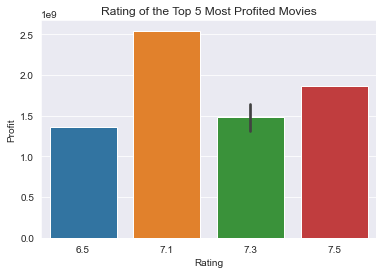

In [37]:
x = most_profited5['vote_average'].head()
y = most_profited5['profit'].head()
barplot2D(x, y, "Rating of the Top 5 Most Profited Movies",  "Rating", "Profit")

The most rated movie is not the most profit generated movie. But it's noted that the most profit generated movie has rating above `7.1`

* **What is the budget of the most rated movies?**

In [38]:
rev_bed_rat = df.sort_values(by='vote_average', ascending=False).query('budget>0 & revenue>0').reset_index(drop=True)

In [39]:
top5 = rev_bed_rat[['budget', 'revenue', 'profit', 'vote_average', 'runtime', 'popularity', 'genres']]
top5.head()

,budget,revenue,profit,vote_average,runtime,popularity,genres
0,25000000,28341469,3341469,8.4,142,7.192039,Drama|Crime
1,1200000,4978922,3778922,8.4,88,0.283191,Documentary|Music
2,6000000,245066411,239066411,8.3,175,5.738034,Drama|Crime
3,3300000,13993093,10693093,8.2,105,4.780419,Drama|Music
4,63000000,100853753,37853753,8.1,139,8.947905,Drama


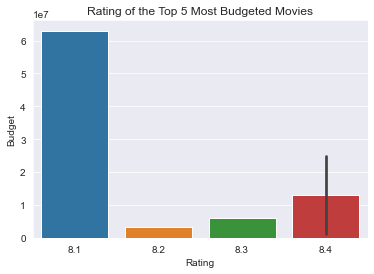

In [40]:
x = top5['vote_average'].head()
y = top5['budget'].head()
barplot2D(x, y, "Rating of the Top 5 Most Budgeted Movies",  "Rating", "Budget")

The most budgeted movie has a high rating but it's not the highest rated movie

<AxesSubplot:xlabel='vote_average', ylabel='budget'>

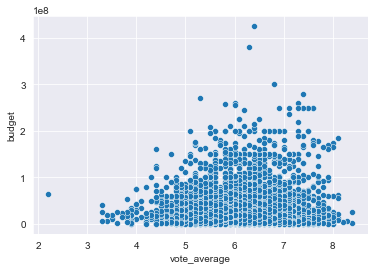

In [41]:
# scatter plot of the relationship between budget and rating
sns.scatterplot(x=top5['vote_average'], 
            y=top5['budget'])

Budget and rating features of movies do not correlate

* **What is the relation between movies rating and popularity?**

In [42]:
df[['vote_average', 'popularity']].corr()

,vote_average,popularity
vote_average,1.000000,0.210426
popularity,0.210426,1.000000


Text(0.5, 1.0, 'Relationship Between Vote and Popularity')

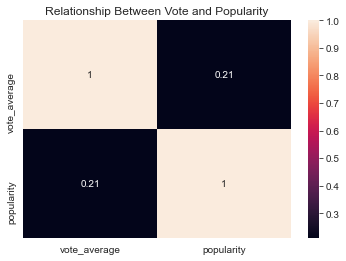

In [43]:
# visualizing the correlation
sns.heatmap(df[['vote_average', 'popularity']].corr(), annot=True)
plt.title("Relationship Between Vote and Popularity")

Text(0, 0.5, 'Popularity')

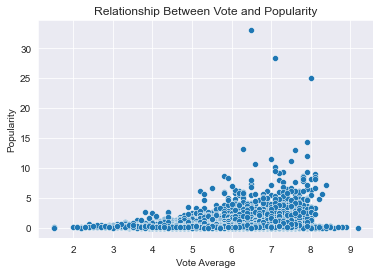

In [44]:
# visualizing the correlation
sns.scatterplot(x=df['vote_average'], y=df['popularity'])
plt.title("Relationship Between Vote and Popularity")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")

There is a slight positive correlation between average rating and popularity

### CONCLUSION

<ul>
    <li>The genre of the most popular movie is: <code>Action|Adventure|Science Fiction|Thriller</code></li>
    <li>Movies with higher ratings between <code>8.5</code> and <code>9.2</code> have a runtime of <code>900</code> minutes.</li>
    <li>Movies with smaller ratings between <code>105</code> and <code>2.3</code> have a maximum duration of <code>92.5</code> minutes.</li>
    <li>Most adventure movies last for more than <code>200</code> minutes</li>
    <li>The most rated movie is not the most profit generated movie. But it's noted that the most profit generated movies have rating above <code>7.1</code>.</li>
    <li>The most budgeted movie has a high rating but it's not the highest rated movie.</li>
    <li>There is a slight positive correlation between rating and popularity.</li>
</ul>

### LIMITATION
<ul>
    <li>From the data, i was initially confused as what future i was to use for movies rating, in which i eventually used the <code>vote_average</code>.</li>
    <li>I am  really not sure what metrics was used to derive the <code>vote_average</code> features. But i used it as my dependent varible anyway.</li>
    <li>The <code>vote_average</code> feature has a value between <code>1.5</code> and <code>9.2</code> which is not a consistent ordinal categorical values.</li>
</ul>

# THANK YOU